In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import plot_roc_curve, roc_curve, roc_auc_score
from sklearn.svm import SVC
from sklearn.preprocessing import MinMaxScaler, Normalizer, StandardScaler, RobustScaler, MaxAbsScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_selection import SelectFromModel

In [3]:
svc = SVC(C=1, gamma=0.001)
minMax = MinMaxScaler()
norm = Normalizer()
stdSc = StandardScaler()
robustSc = RobustScaler()
maxAbs = MaxAbsScaler()

In [4]:
file = open('ClaMP_Integrated.csv')
df = pd.read_csv(file, encoding='utf-8')

In [5]:
pt = df['packer_type'].unique()
p_types = {pt[i] : i for i in range(len(pt))}

In [6]:
temp = []
for t in df['packer_type']:
    temp.append(p_types[t])
df['pt_num'] = temp
cl = df.pop('class')
df.pop('packer_type')
x_train, x_test, y_train, y_test = train_test_split(df, cl, random_state=0)

In [7]:
X_train_minmaxSc = minMax.fit_transform(x_train)
X_test_minmaxSc = minMax.transform(x_test)

X_train_norm = norm.fit_transform(x_train)
X_test_norm = norm.transform(x_test)

X_train_std = stdSc.fit_transform(x_train)
X_test_std = stdSc.transform(x_test)

X_train_robust = robustSc.fit_transform(x_train)
X_test_robust = robustSc.transform(x_test)

X_train_maxAbs = maxAbs.fit_transform(x_train)
X_test_maxAbs = maxAbs.transform(x_test)

y_tr_minmax = X_train_minmaxSc[:, 66]
y_tr_std = X_train_std[:, 66]
y_tr_robust = X_train_robust[:, 66]
y_tr_maxAbs = X_test_maxAbs[:, 66]
y_tr_norm = X_train_norm[:, 66]
y_tr = pd.DataFrame.to_numpy(x_train)[:, 66]
x = np.arange(1, 20)

y_t_minmax = X_test_minmaxSc[:, 66]
y_t_std = X_test_std[:, 66]
y_t_robust = X_test_robust[:, 66]
y_t_maxAbs = X_test_maxAbs[:, 66]
y_t_norm = X_test_norm[:, 66]
y_t = pd.DataFrame.to_numpy(x_test)[:, 66]
x = np.arange(1, 21)

print(x)
print(len(x))
print(y_tr[:20])
print(len(y_tr[:20]))

[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20]
20
[7.46421454 7.64196901 4.94290746 6.90995453 7.87127401 7.80579433
 5.88229437 5.63617813 5.42781771 4.93404002 7.65483076 7.73562736
 5.93614946 7.9098318  6.36231149 5.88479228 7.9760642  7.95620869
 6.06303787 7.66250715]
20


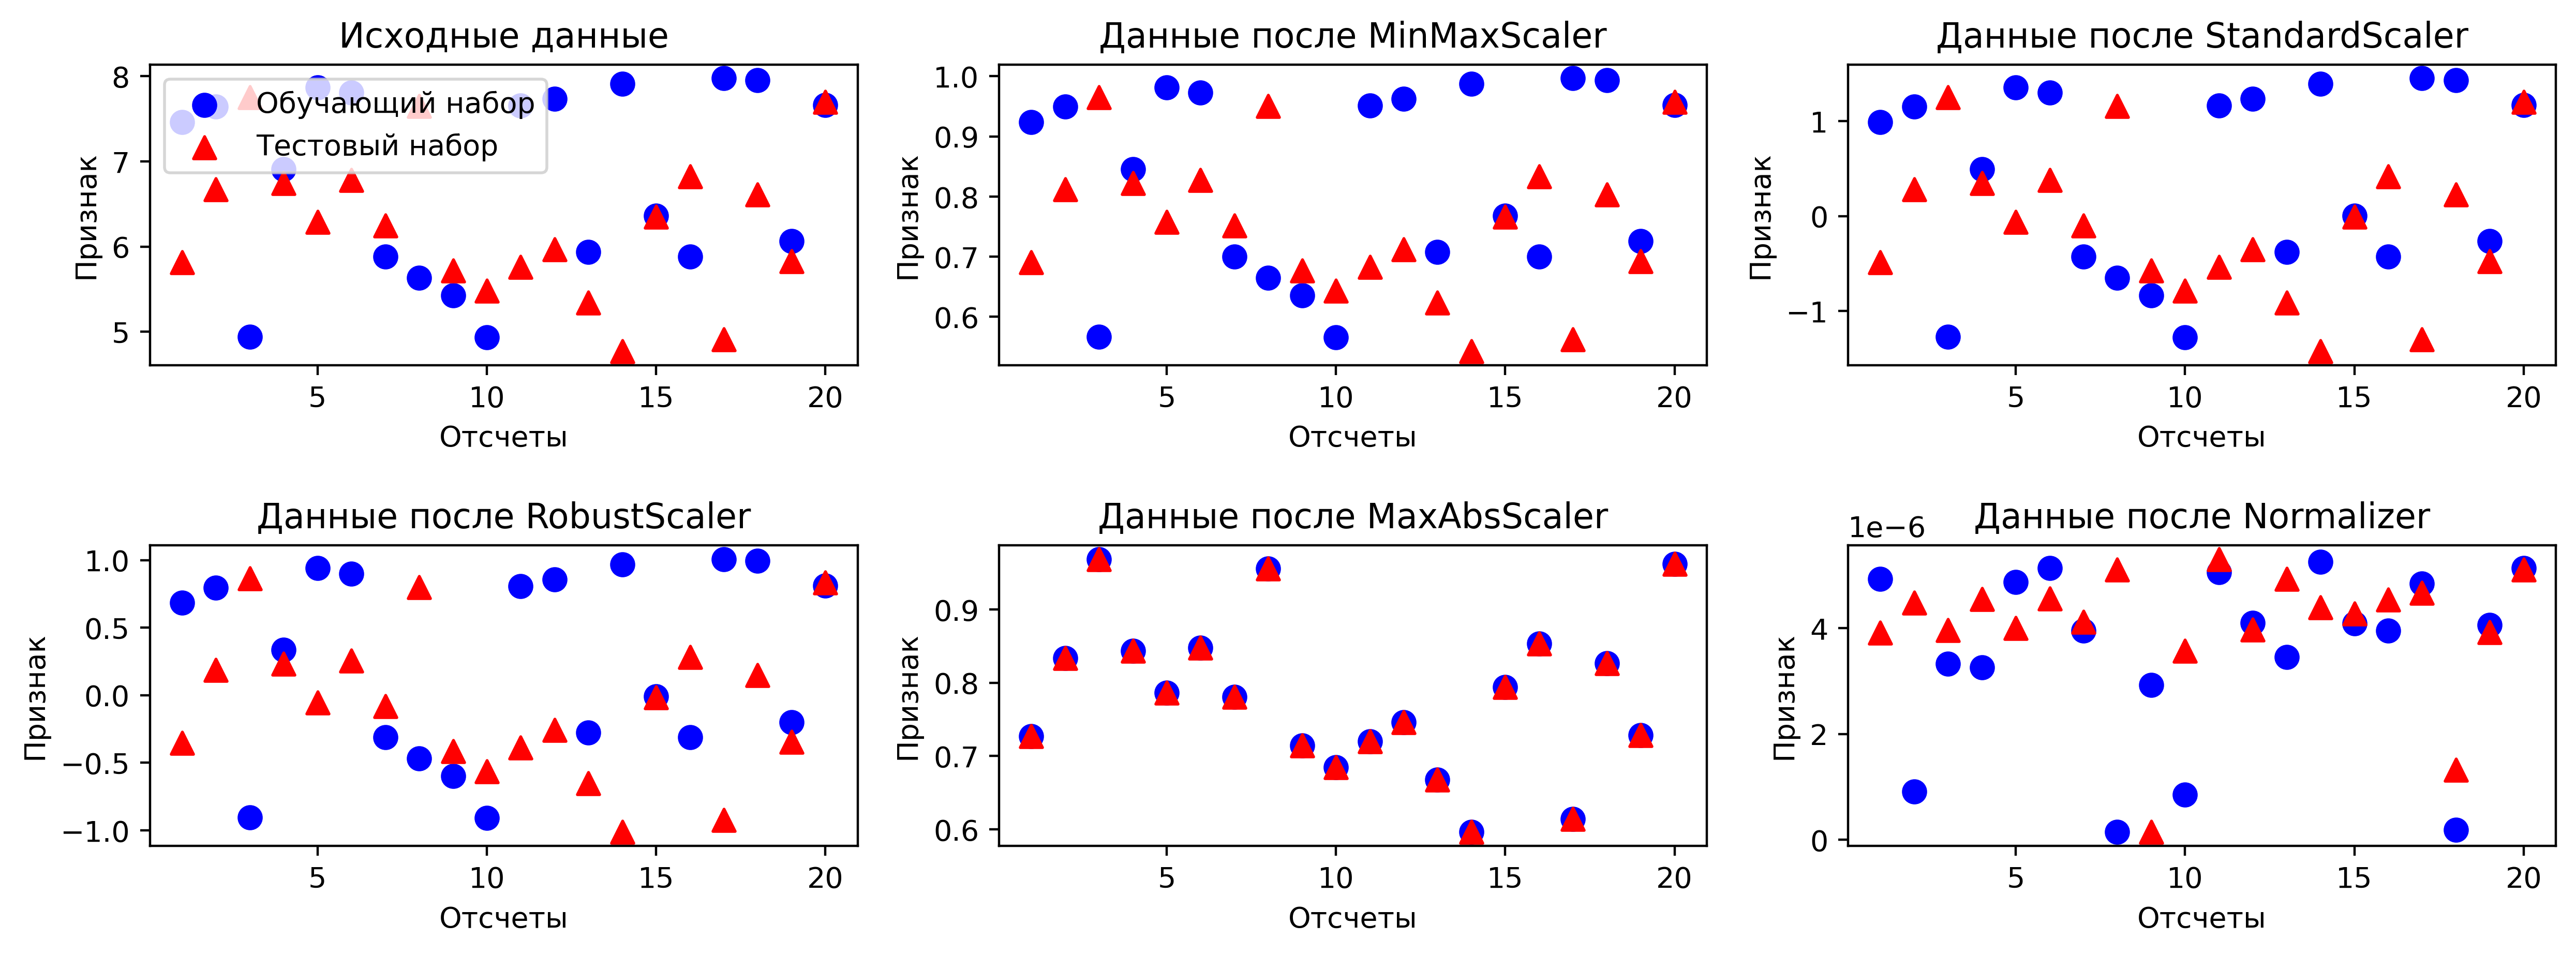

In [8]:
fig, axes = plt.subplots(2, 3, figsize = (15, 5), dpi=400 )
plt.subplots_adjust(hspace= .6)

axes[0][0].scatter(x, y_tr[:20], color='b', label = "Обучающий набор", s=60)
axes[0][0].scatter(x, y_t[:20], color='r', marker='^', 
    label = "Тестовый набор", s=60)
axes[0][0].legend(loc = "upper left")
axes[0][0].set_title('Исходные данные')

axes[0][1].scatter(x, y_tr_minmax[:20], color='b', 
    label = "Обучающий набор", s=60)
axes[0][1].scatter(x, y_t_minmax[:20], color='r', marker='^', 
    label = "Тестовый набор", s=60)
axes[0][1].set_title('Данные после MinMaxScaler')

axes[0][2].scatter(x, y_tr_std[:20], color='b', 
    label = "Обучающий набор", s=60)
axes[0][2].scatter(x, y_t_std[:20], color='r', marker='^', 
    label = "Тестовый набор", s=60)
axes[0][2].set_title('Данные после StandardScaler')

axes[1][0].scatter(x, y_tr_robust[:20], color='b', 
    label = "Обучающий набор", s=60)
axes[1][0].scatter(x, y_t_robust[:20], color='r', marker='^', 
    label = "Тестовый набор", s=60)
axes[1][0].set_title('Данные после RobustScaler')

axes[1][1].scatter(x, y_tr_maxAbs[:20], color='b', 
    label = "Обучающий набор", s=60)
axes[1][1].scatter(x, y_t_maxAbs[:20], color='r', marker='^', 
    label = "Тестовый набор", s=60)
axes[1][1].set_title('Данные после MaxAbsScaler')

axes[1][2].scatter(x, y_tr_norm[:20], color='b', 
    label = "Обучающий набор", s=60)
axes[1][2].scatter(x, y_t_norm[:20], color='r', marker='^', 
    label = "Тестовый набор", s=60)
axes[1][2].set_title('Данные после Normalizer')

for ax in axes:
    for a in ax:
        a.set_xlabel('Отсчеты')
        a.set_ylabel('Признак')

In [9]:
param_grid = {'C':[0.1, 1, 10, 100],
    'gamma':[0.001, 0.01, 0.1, 1]}

grid_search = GridSearchCV(SVC(), param_grid, cv=5, n_jobs=-1)
grid_search.fit(x_train.to_numpy(), y_train)

print('Правильность на исходном наборе: {:.3f}'.format(
    grid_search.score(x_test.to_numpy(), y_test)))

print('Наилучшая модель:{}'.format(grid_search.best_estimator_))

grid_search.fit(X_train_minmaxSc, y_train)
print('Правильность после MinMaxScaler: {:.3f}'.format(
    grid_search.score(X_test_minmaxSc, y_test)))

print('Наилучшая модель:{}'.format(grid_search.best_estimator_))

grid_search.fit(X_train_norm, y_train)
print('Правильность после Normalizer: {:.3f}'.format(
    grid_search.score(X_test_norm, y_test)))

print('Наилучшая модель:{}'.format(grid_search.best_estimator_))

grid_search.fit(X_train_std, y_train)
print('Правильность после StandardScaler: {:.3f}'.format(
    grid_search.score(X_test_std, y_test)))

print('Наилучшая модель:{}'.format(grid_search.best_estimator_))

grid_search.fit(X_train_robust, y_train)
print('Правильность после RobustScaler: {:.3f}'.format(
    grid_search.score(X_test_robust, y_test)))

print('Наилучшая модель:{}'.format(grid_search.best_estimator_))

grid_search.fit(X_train_maxAbs, y_train)
print('Правильность после MaxAbsScaler: {:.3f}'.format(
    grid_search.score(X_test_maxAbs, y_test)))

print('Наилучшая модель:{}'.format(grid_search.best_estimator_))

Правильность на исходном наборе: 0.612
Наилучшая модель:SVC(C=1, gamma=0.001)
Правильность после MinMaxScaler: 0.974
Наилучшая модель:SVC(C=100, gamma=1)
Правильность после Normalizer: 0.874
Наилучшая модель:SVC(C=100, gamma=1)
Правильность после StandardScaler: 0.982
Наилучшая модель:SVC(C=100, gamma=0.01)
Правильность после RobustScaler: 0.959
Наилучшая модель:SVC(C=100, gamma=0.001)
Правильность после MaxAbsScaler: 0.974
Наилучшая модель:SVC(C=100, gamma=1)


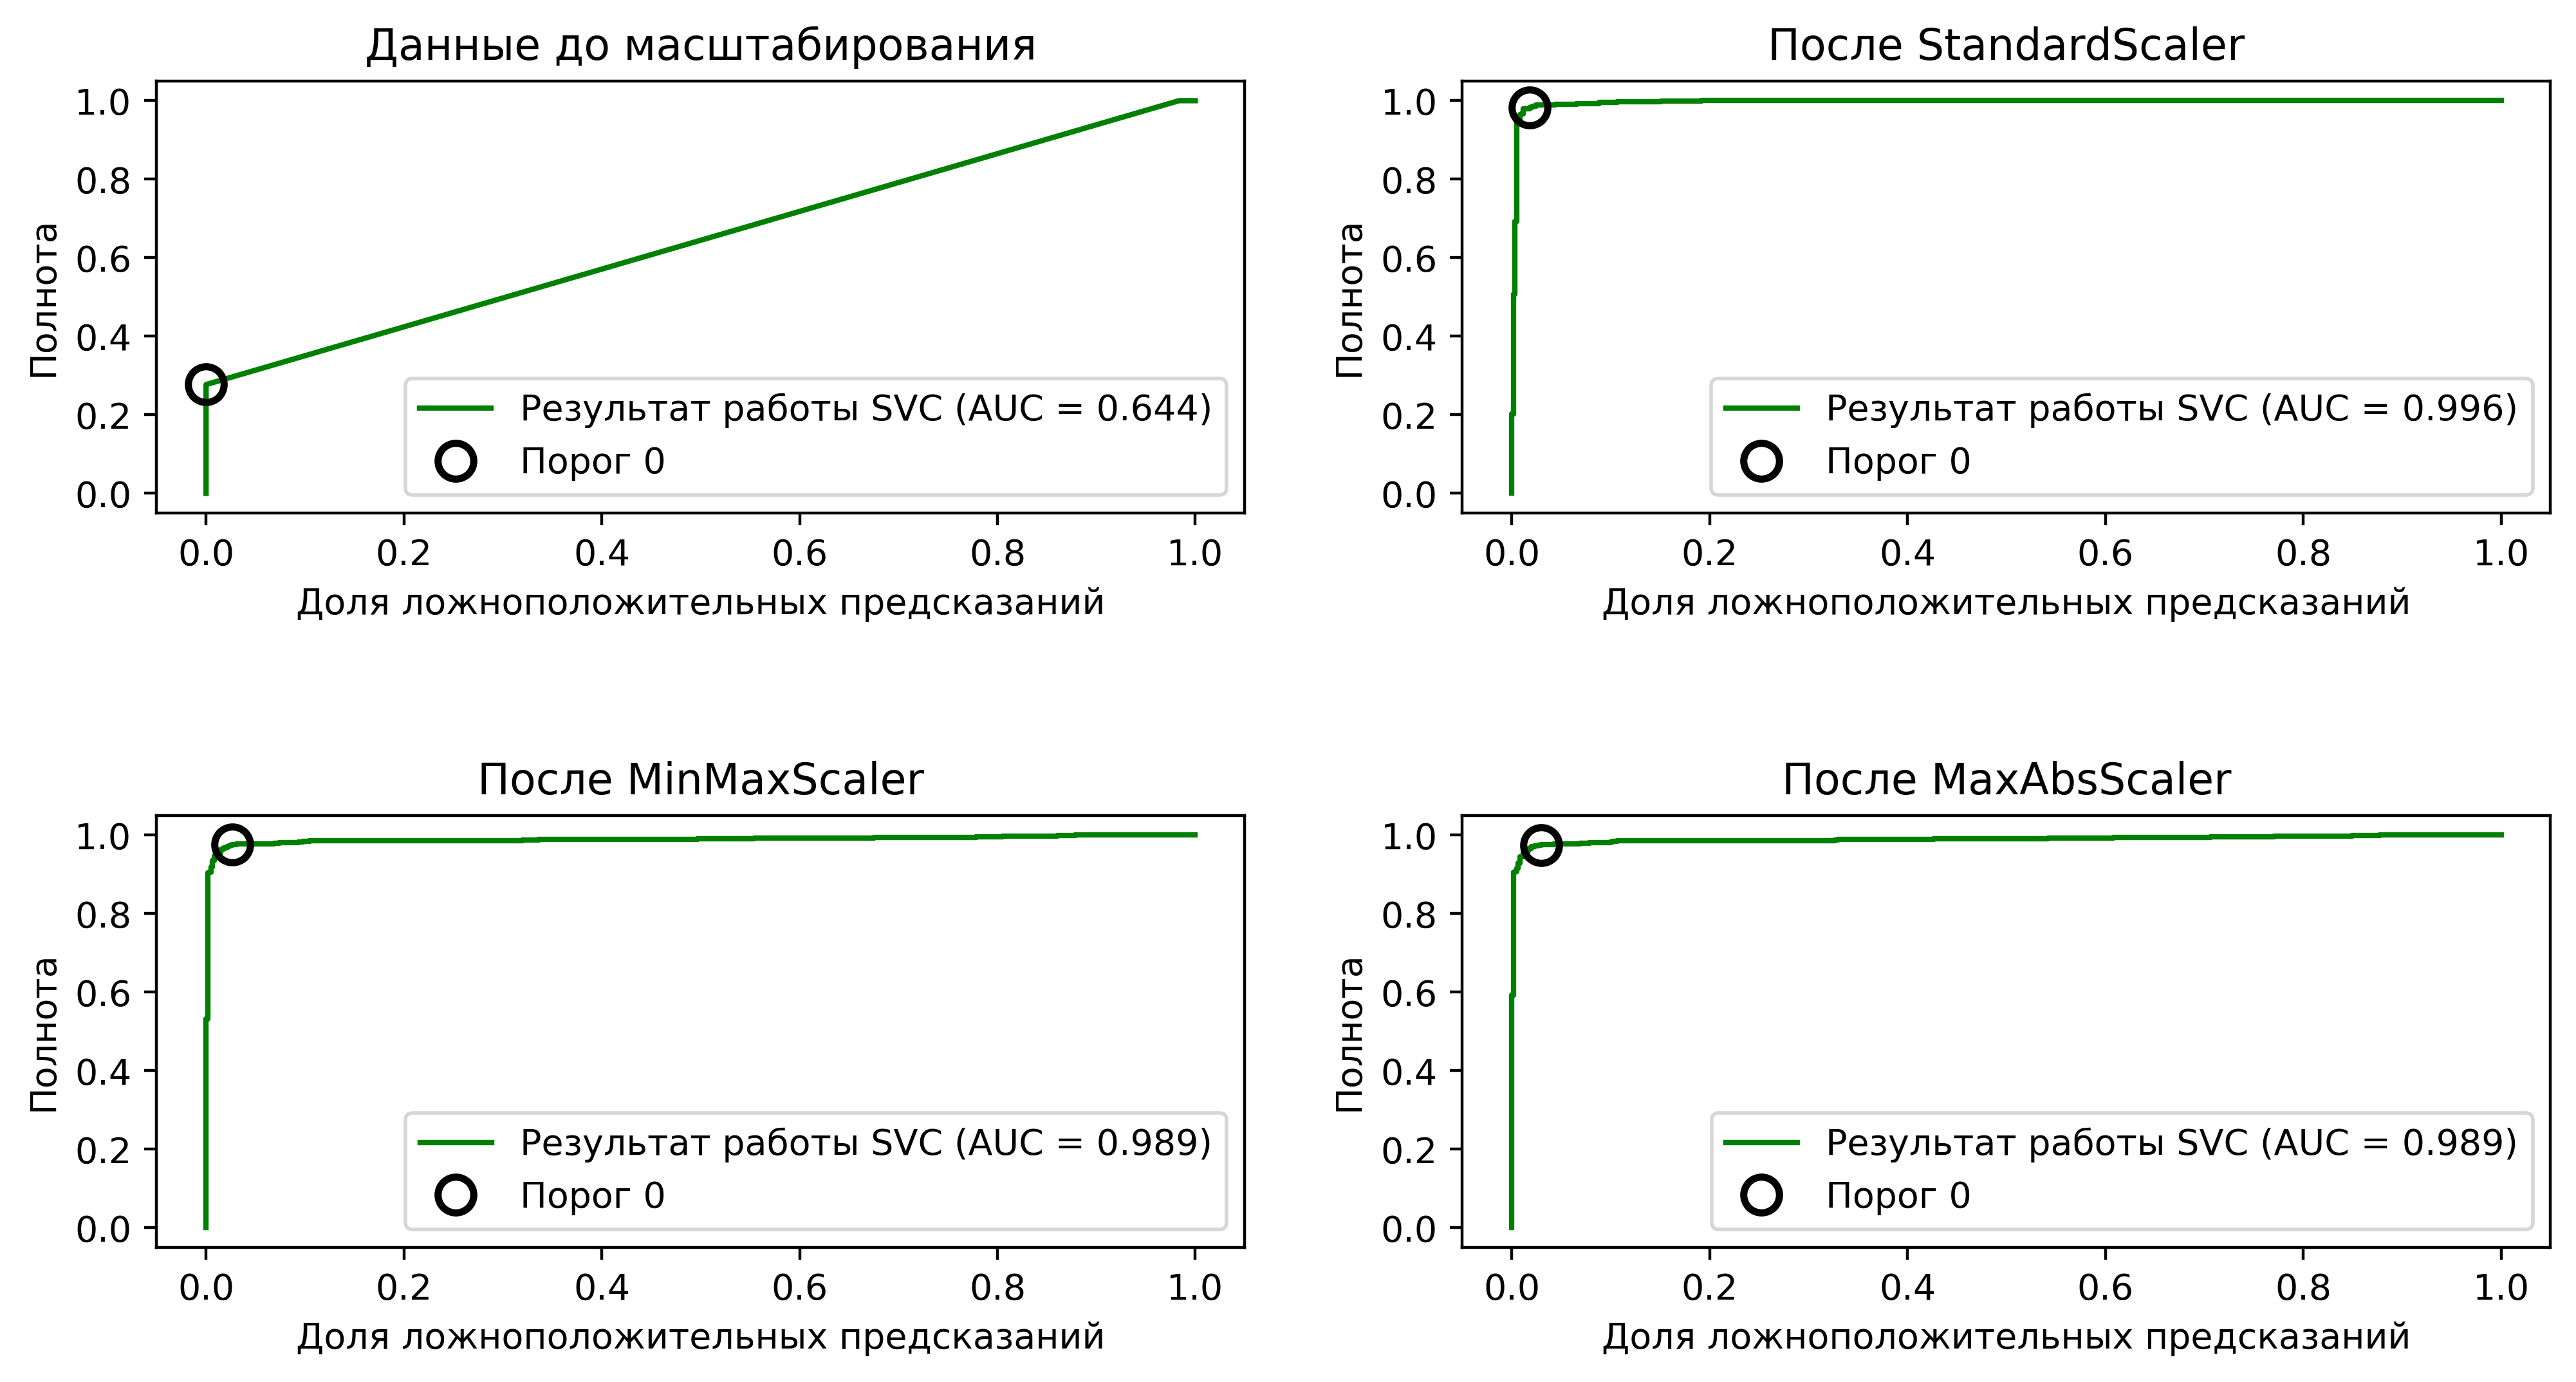

In [20]:
fig, axes = plt.subplots(2, 2, figsize=(12, 6), dpi=400)
plt.subplots_adjust(hspace=.7)

svc = SVC(C=1, gamma=0.001).fit(x_train.to_numpy(), y_train)
res = svc.decision_function(x_test.to_numpy())
fpr_svc, tpr_svc, thresholds_svc = roc_curve(
    y_test, res)
close_zero = np.argmin(np.abs(thresholds_svc))

axes[0][0].plot(fpr_svc, tpr_svc, color='g', 
    label='Результат работы SVC (AUC = {:.3f})'.format(
        roc_auc_score(y_test, res)))
axes[0][0].plot(fpr_svc[close_zero], tpr_svc[close_zero], 'o', markersize=10,
    label='Порог 0', fillstyle='none', c='k', mew=2)
axes[0][0].legend(loc='lower right')
axes[0][0].set_title('Данные до масштабирования')

svc = SVC(C=100, gamma=0.01).fit(X_train_std, y_train)
res = svc.decision_function(X_test_std)
fpr_svc, tpr_svc, thresholds_svc = roc_curve(
    y_test, res)

close_zero = np.argmin(np.abs(thresholds_svc))

axes[0][1].plot(fpr_svc, tpr_svc, color='g', 
    label='Результат работы SVC (AUC = {:.3f})'.format(
        roc_auc_score(y_test, res)))
axes[0][1].plot(fpr_svc[close_zero], tpr_svc[close_zero], 'o', markersize=10,
    label='Порог 0', fillstyle='none', c='k', mew=2)
axes[0][1].legend(loc='lower right')
axes[0][1].set_title('После StandardScaler')

svc = SVC(C=100, gamma=1).fit(X_train_minmaxSc, y_train)
res = svc.decision_function(X_test_minmaxSc)
fpr_svc, tpr_svc, thresholds_svc = roc_curve(
    y_test, res)

close_zero = np.argmin(np.abs(thresholds_svc))

axes[1][0].plot(fpr_svc, tpr_svc, color='g', 
    label='Результат работы SVC (AUC = {:.3f})'.format(
        roc_auc_score(y_test, res)))
axes[1][0].plot(fpr_svc[close_zero], tpr_svc[close_zero], 'o', markersize=10,
    label='Порог 0', fillstyle='none', c='k', mew=2)
axes[1][0].legend(loc='lower right')
axes[1][0].set_title('После MinMaxScaler')

svc = SVC(C=100, gamma=1).fit(X_train_maxAbs, y_train)
res = svc.decision_function(X_test_maxAbs)
fpr_svc, tpr_svc, thresholds_svc = roc_curve(
    y_test, res)

close_zero = np.argmin(np.abs(thresholds_svc))

axes[1][1].plot(fpr_svc, tpr_svc, color='g', 
    label='Результат работы SVC (AUC = {:.3f})'.format(
        roc_auc_score(y_test, res)))
axes[1][1].plot(fpr_svc[close_zero], tpr_svc[close_zero], 'o', markersize=10,
    label='Порог 0', fillstyle='none', c='k', mew=2)
axes[1][1].legend(loc='lower right')
axes[1][1].set_title('После MaxAbsScaler')

for ax in axes:
    for a in ax:
        a.set_xlabel('Доля ложноположительных предсказаний')
        a.set_ylabel('Полнота')

Index(['e_cblp', 'e_cp', 'e_cparhdr', 'e_maxalloc', 'e_sp', 'e_lfanew',
       'NumberOfSections', 'CreationYear', 'FH_char0', 'FH_char1', 'FH_char2',
       'FH_char3', 'FH_char4', 'FH_char5', 'FH_char6', 'FH_char7', 'FH_char8',
       'FH_char9', 'FH_char10', 'FH_char11', 'FH_char12', 'FH_char13',
       'FH_char14', 'MajorLinkerVersion', 'MinorLinkerVersion', 'SizeOfCode',
       'SizeOfInitializedData', 'SizeOfUninitializedData',
       'AddressOfEntryPoint', 'BaseOfCode', 'BaseOfData', 'ImageBase',
       'SectionAlignment', 'FileAlignment', 'MajorOperatingSystemVersion',
       'MinorOperatingSystemVersion', 'MajorImageVersion', 'MinorImageVersion',
       'MajorSubsystemVersion', 'MinorSubsystemVersion', 'SizeOfImage',
       'SizeOfHeaders', 'CheckSum', 'Subsystem', 'OH_DLLchar0', 'OH_DLLchar1',
       'OH_DLLchar2', 'OH_DLLchar3', 'OH_DLLchar4', 'OH_DLLchar5',
       'OH_DLLchar6', 'OH_DLLchar7', 'OH_DLLchar8', 'OH_DLLchar9',
       'OH_DLLchar10', 'SizeOfStackReserve', 'SizeO

Text(0.5, 0, 'Индекс примера')

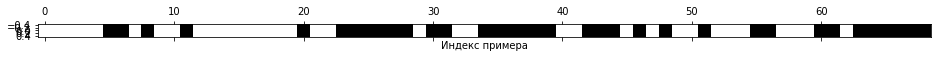

In [14]:
print(df.columns)
selectedModel = SelectFromModel(RandomForestClassifier(n_estimators=500, max_depth=100), threshold = 'median')
selectedModel.fit(x_train, y_train)
selectedModel.transform(x_train)
mask = selectedModel.get_support()

mask = mask.reshape(1, -1)
plt.matshow(mask, fignum=3, cmap='gray_r')
print(mask.shape)
plt.xlabel('Индекс примера')